In [31]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import pickle

In [14]:
# Define the folder containing the CSV files
folder_path = r'C:\Users\91944\Downloads\AWS\Wind_power_forecasting\data'

In [4]:
# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to store dataframes
dataframes = []

# Read each CSV file and append to the list
for i, file in enumerate(csv_files):
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df['Location']=f'Location{i+1}'
    dataframes.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_df.to_csv('combined_data.csv', index=False)

print("CSV files combined successfully!")

CSV files combined successfully!


In [109]:
df=pd.read_csv('combined_data.csv')
df.tail()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
175195,2021-12-31 19:00:00,25.5,94,24.0,4.01,6.66,4,8,8.2,0.3417,Location4
175196,2021-12-31 20:00:00,25.3,92,23.2,4.70,7.52,1,5,7.9,0.3342,Location4
175197,2021-12-31 21:00:00,24.9,90,22.5,4.61,7.57,4,8,7.9,0.3267,Location4
175198,2021-12-31 22:00:00,24.9,89,22.1,4.60,7.44,2,6,7.8,0.3192,Location4
175199,2021-12-31 23:00:00,24.9,88,21.8,4.65,7.77,9,12,7.8,0.3117,Location4


In [6]:
# Convert the 'time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Extract year, month, day, and hour into separate columns
df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month
df['day'] = df['Time'].dt.day
df['hour'] = df['Time'].dt.hour

In [7]:
df.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location,year,month,day,hour
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,Location1,2017,1,2,0
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,Location1,2017,1,2,1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,Location1,2017,1,2,2
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,Location1,2017,1,2,3
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,Location1,2017,1,2,4


In [8]:
df.dtypes

Time                   datetime64[ns]
temperature_2m                float64
relativehumidity_2m             int64
dewpoint_2m                   float64
windspeed_10m                 float64
windspeed_100m                float64
winddirection_10m               int64
winddirection_100m              int64
windgusts_10m                 float64
Power                         float64
Location                       object
year                            int32
month                           int32
day                             int32
hour                            int32
dtype: object

In [110]:
df.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000
mean,46.655994,70.155291,36.516241,4.157639,6.879334,201.589446,201.539070,8.038205,0.303429
std,22.012738,17.326678,20.933153,2.012682,3.043964,99.639040,100.683777,3.617488,0.257325
min,-31.200000,9.000000,-36.200000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000
25%,30.200000,57.000000,21.900000,2.630000,4.700000,130.000000,129.000000,5.300000,0.087700
50%,46.900000,72.000000,36.200000,3.850000,6.680000,211.000000,211.000000,7.600000,0.233100
75%,65.300000,84.000000,54.600000,5.380000,8.800000,288.000000,290.000000,10.300000,0.474200
max,101.700000,100.000000,78.700000,18.530000,24.590000,360.000000,360.000000,29.200000,0.999400


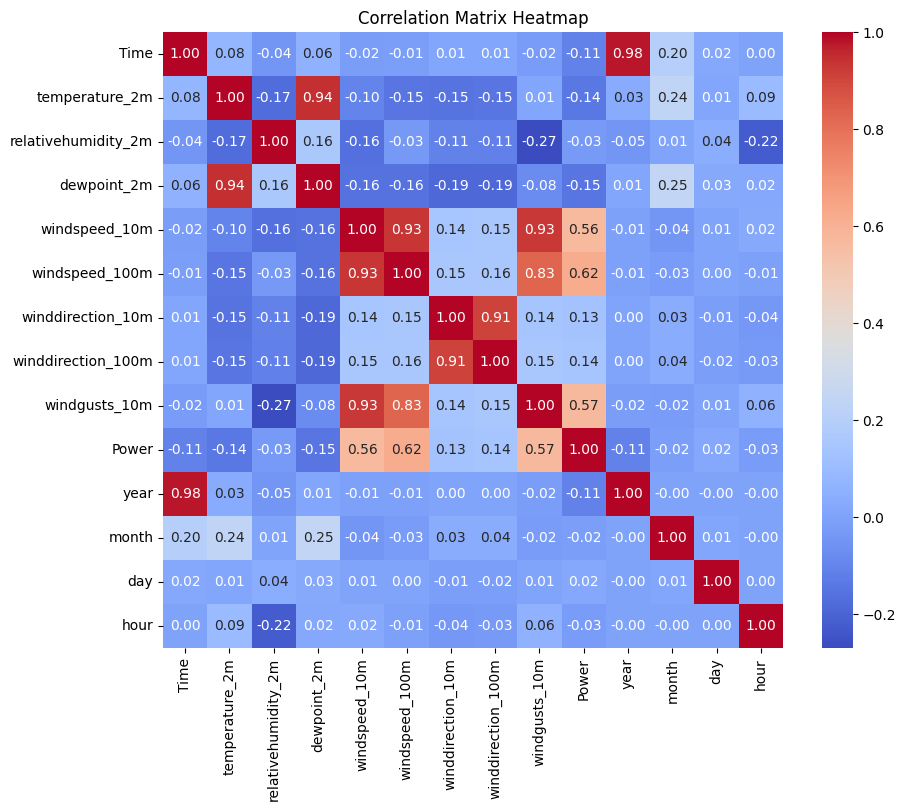

In [9]:
#Correlation_Matrix
num_features = df.select_dtypes(exclude="object")
correlation_mat=num_features.corr()


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(correlation_mat)

                         Time  temperature_2m  relativehumidity_2m  \
Time                 1.000000        0.075893            -0.043442   
temperature_2m       0.075893        1.000000            -0.173985   
relativehumidity_2m -0.043442       -0.173985             1.000000   
dewpoint_2m          0.059300        0.942370             0.160017   
windspeed_10m       -0.020405       -0.104589            -0.162912   
windspeed_100m      -0.014767       -0.150422            -0.034469   
winddirection_10m    0.008955       -0.153010            -0.107516   
winddirection_100m   0.010450       -0.150095            -0.113267   
windgusts_10m       -0.024092        0.010929            -0.270695   
Power               -0.109664       -0.141187            -0.031405   
year                 0.979796        0.028937            -0.046382   
month                0.197585        0.240017             0.006862   
day                  0.017821        0.011568             0.041000   
hour                

In [11]:
X= df.drop(['Time','Location','year', 'month', 'day', 'hour','Power'], axis=1)
y = df['Power']

In [15]:
# Split the data into training (60%) and remaining data (40%)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the remaining data into validation (50% of remaining) and test (50% of remaining)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Print the sizes of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 105120
Validation set size: 35040
Test set size: 35040


In [20]:
X_train.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m
28059,25.7,85,21.8,3.04,6.63,153,157,5.3
101295,72.6,54,54.8,7.08,9.70,317,318,12.6
161346,71.2,95,69.7,6.80,11.22,311,310,8.5
141338,31.6,99,31.3,0.50,0.94,360,212,1.9
109707,64.6,90,61.6,2.38,5.95,202,205,3.8


In [25]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [26]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f"{name} - Mean Squared Error: {mse}")

Linear Regression - Mean Squared Error: 0.03705914715788856
Lasso - Mean Squared Error: 0.06445991275556245
Ridge - Mean Squared Error: 0.03705913684789359
K-Neighbors Regressor - Mean Squared Error: 0.03700945919614155
Decision Tree - Mean Squared Error: 0.05743853788613014
Random Forest Regressor - Mean Squared Error: 0.0288040715759633
XGBRegressor - Mean Squared Error: 0.03057772203898986
CatBoosting Regressor - Mean Squared Error: 0.030236464329940285
AdaBoost Regressor - Mean Squared Error: 0.03973324911196406
Neural Network - Mean Squared Error: 0.03951082664835611


In [27]:
# Define the models and their hyperparameters for tuning
models = {
    "Linear Regression": (LinearRegression(), {}),
    "Lasso": (Lasso(), {"alpha": [0.1, 1.0, 10.0]}),
    "Ridge": (Ridge(), {"alpha": [0.1, 1.0, 10.0]}),
    "K-Neighbors Regressor": (KNeighborsRegressor(), {"n_neighbors": [3, 5, 7]}),
    "Decision Tree": (DecisionTreeRegressor(), {"max_depth": [None, 10, 20, 30]}),
    "Random Forest Regressor": (RandomForestRegressor(), {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}),
    "XGBRegressor": (XGBRegressor(), {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}),
    "CatBoosting Regressor": (CatBoostRegressor(verbose=False), {"iterations": [100, 200], "learning_rate": [0.01, 0.1]}),
    "AdaBoost Regressor": (AdaBoostRegressor(), {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1.0]}),
    "Neural Network": (MLPRegressor(max_iter=1000), {"hidden_layer_sizes": [(50,), (100,), (50, 50)], "alpha": [0.0001, 0.001, 0.01]})
}

In [28]:
# Perform hyperparameter tuning and evaluate each model
best_models = {}
for name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    y_pred = best_model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f"{name} - Best Parameters: {grid_search.best_params_} - Mean Squared Error: {mse}")

# Print the best models and their parameters
for name, model in best_models.items():
    print(f"Best {name}: {model}")

Linear Regression - Best Parameters: {} - Mean Squared Error: 0.03705914715788856
Lasso - Best Parameters: {'alpha': 0.1} - Mean Squared Error: 0.04043407466993702
Ridge - Best Parameters: {'alpha': 1.0} - Mean Squared Error: 0.03705913684789359
K-Neighbors Regressor - Best Parameters: {'n_neighbors': 7} - Mean Squared Error: 0.03621426197075645
Decision Tree - Best Parameters: {'max_depth': 10} - Mean Squared Error: 0.03425400205521873
Random Forest Regressor - Best Parameters: {'max_depth': None, 'n_estimators': 200} - Mean Squared Error: 0.02865561934964619
XGBRegressor - Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200} - Mean Squared Error: 0.030274915559019202
CatBoosting Regressor - Best Parameters: {'iterations': 200, 'learning_rate': 0.1} - Mean Squared Error: 0.031501347785835604
AdaBoost Regressor - Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100} - Mean Squared Error: 0.037759286636088886
Neural Network - Best Parameters: {'alpha': 0.0001, 'hidden_la

In [32]:
# Make predictions on the test dataset and save the models as pickle files
os.makedirs('artifacts', exist_ok=True)
for name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    print(f"{name} - Test Mean Squared Error: {test_mse}")
    
    # Save the model as a pickle file
    model_filename = f'artifacts/{name.replace(" ", "_")}_model.pkl'
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Saved {name} model to {model_filename}")

Linear Regression - Test Mean Squared Error: 0.03685479343481654
Saved Linear Regression model to artifacts/Linear_Regression_model.pkl
Lasso - Test Mean Squared Error: 0.04093896557617678
Saved Lasso model to artifacts/Lasso_model.pkl
Ridge - Test Mean Squared Error: 0.03685481989666118
Saved Ridge model to artifacts/Ridge_model.pkl
K-Neighbors Regressor - Test Mean Squared Error: 0.03672094217019616
Saved K-Neighbors Regressor model to artifacts/K-Neighbors_Regressor_model.pkl
Decision Tree - Test Mean Squared Error: 0.0342436168611236
Saved Decision Tree model to artifacts/Decision_Tree_model.pkl
Random Forest Regressor - Test Mean Squared Error: 0.02858993382466828
Saved Random Forest Regressor model to artifacts/Random_Forest_Regressor_model.pkl
XGBRegressor - Test Mean Squared Error: 0.030100559170068014
Saved XGBRegressor model to artifacts/XGBRegressor_model.pkl
CatBoosting Regressor - Test Mean Squared Error: 0.03129296104440762
Saved CatBoosting Regressor model to artifacts/C

In [62]:
df['Location'].value_counts()

Location
Location1    43800
Name: count, dtype: int64

In [ ]:
# Load the CSV file
file_path = r'C:\Users\91944\Downloads\AWS\Wind_power_forecasting\artifacts\combined_forecast.csv'
df = pd.read_csv(file_path, header=None, low_memory=False)

# Generate the datetime range starting from 2017-01-02 00:00:00 with hourly frequency
start_date = '2017-01-01 23:00:00'
date_range = pd.date_range(start=start_date, periods=len(df), freq='h')

# Add the datetime range as a new column
df.insert(0, 'Date', date_range)

# Drop the second row which is a duplicate of the header
df.drop(0, inplace=True)

# Rename the columns
df.columns = ['Date', 'Index', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m']

# Drop the 'Index' column
df.drop('Index', axis=1, inplace=True)

# Save the modified DataFrame back to CSV with the first row as header
output_file_path = r'C:\Users\91944\Downloads\AWS\Wind_power_forecasting\artifacts\combined_forecast.csv'
df.to_csv(output_file_path, index=False)

print(f"CSV file has been modified and saved to {output_file_path}")

CSV file has been modified and saved to C:\Users\91944\Downloads\AWS\Wind_power_forecasting\artifacts\modified_combined_forecast.csv
